<a href="https://colab.research.google.com/github/syc113/syc113/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialization

# Import Data

In [1]:
import nltk
import requests
from textblob import TextBlob
from nltk.corpus import stopwords
from operator import itemgetter
import pandas as pd
import imageio
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Loading the Dataset

In [3]:
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text
blob=TextBlob(data)

In [4]:
stop_words = stopwords.words('english')

# Getting the Word Frequencies

In [5]:
items = blob.word_counts.items()

# Eliminating the Stop Words

In [6]:
items = [item for item in items if item[0] not in stop_words]

# Sorting the Words by Frequency

In [7]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

# Getting the Top 20 Words

In [8]:
top20 = sorted_items[:20]

# Convert top20 to a DataFrame

In [15]:
df = pd.DataFrame(top20, columns=['word', 'count']) 
df

,word,count
0,ham,337
1,lord,211
2,haue,175
3,king,173
4,shall,107
5,hamlet,106
6,come,106
7,thou,105
8,let,104
9,good,99


# Visualizing the DataFrame

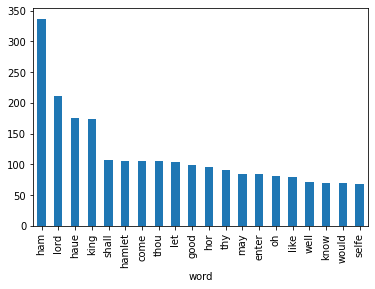

In [10]:
df.plot.bar(x='word', y='count', legend=False)

# Loading the Mask Image that Specifies the Word Cloud’s Shape

In [11]:
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

# Configuring the WordCloud Object

In [12]:
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

# Generating the Word Cloud

In [13]:
wordcloud = wordcloud.generate(data)

# Displaying the Image with Matplotlib

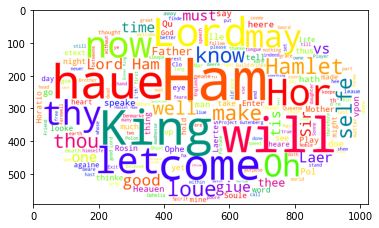

In [14]:
plt.imshow(wordcloud)